# ○データの整形

## モジュールのインポート

In [1]:
from polyglot.text import Text   #形態素解析

from nltk.tokenize import sent_tokenize

import numpy as np

import pandas as pd

import re  #正規表現

import glob

from natsort import natsorted

#プロット
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder

## 多読本のデータの読み込み

In [2]:
def read_txt(filepath):
    f = open(filepath, 'r', encoding='UTF-8')
    data = f.read()
    f.close()
    return data

all_files = glob.glob('erfpt-data/ERFPT-planeData/' + '*.text')

# 自然順ソート
all_files = natsorted(all_files)


text = []
for file in all_files:
    text.append(read_txt(file))

In [3]:
df = pd.read_csv("./erfpt-data/erfpt-data.csv",  dtype=object)

df.insert(3, 'text', text)

df

,item_id,code,name,text,word_count,publisher,level
0,13,C2,Miranda,The children and their father remember Miranda...,518,Cambridge,5
1,14,P1,Girl Meets Boy,My story starts in late July. It was July 21st...,348,Penguin,6
2,15,O1,New York,One dollar and eighty seven cents. That was al...,629,Oxford,7
3,16,P2,Emil and the Detectives,"'Now, Emil,' said his mother, 'get ready your ...",529,Penguin,8
4,17,O3,Ethan Frome,"If you know Starkfield, Massachusetts, you kno...",699,Oxford,8
5,18,O6,Silas Marner,"In the early years of the nineteenth century, ...",647,Oxford,10
6,19,C5,High Life Low Life,It had been a long day. It was almost time for...,664,Cambridge,10
7,20,O7,Brat Farrar,"'Why can't you eat more politely, Jane? Like y...",666,Oxford,11
8,21,E4,[practice]Come Home,"OK, that's it for today' says Mr. Babic. 'Read...",374,Cengage,3
9,22,E2,The Beautiful Game,"""Yes!"" called Estela as she came off the field...",400,Cengage,4


## 文章を数値データへ

#### 形態素解析のときのメモ
- 空白と改行が入っていても正常に形態素解析が行われる

In [4]:
#クリーニング（テキスト中の記号除去）
def cleaning_text(text):
    code_regex = re.compile('[!"#$%&\'\\\\()*+,\/:;<=>?@[\\]^_`{|}~「」〔〕“”‘’〈〉『』【】＆＊・（）＄＃＠—–、？！｀＋￥％]')
    
    cleaned_text = code_regex.sub('', text)
    
    cleaned_text = cleaned_text.replace('-', ' ').replace('\'s', '')
    
#     ピリオド入れるか入れないか検討
#     cleaned_text = cleaned_text.replace('.', '')
    
    return cleaned_text

df['text'] = df['text'].apply(cleaning_text)



#形態素解析
def morphologicalAnalysis(text):
    tokens = Text(text)
    
    tag_list = []
    for token in tokens.pos_tags:
            tag_list.append(token[1])
    return tag_list

df['maText'] = df['text'].apply(morphologicalAnalysis)




#ラベルエンコーディング
le = LabelEncoder()
tag_list = ['ADJ', 'ADP', 'AUX', 'ADV' , 'CONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'VERB']
le.fit(tag_list)

print(le)

def labelEncoding(maText):
    maText = list(filter(lambda element: element != 'X', maText))
    maText = list(filter(lambda element: element != 'SYM', maText))
    
    num_tag = le.transform(maText) 
    return num_tag

df['text NumData'] = df['maText'].apply(labelEncoding)

LabelEncoder()


In [5]:
#形態素解析後のリストの長さの列を新たに作成

df.insert(5, 'length maText', df["maText"].apply(len))

### ラベルエンコーディング タグ一覧

| No  |  TAG  |   意味       |  単語例   | 
| ---- | ------- |  ------------- |  :-------: | 
| 0   |  ADJ  |   形容詞     | big, old, green, incomprehensible, first | 
| 1   |  ADP  |   接置詞     | in, to, during | 
| 2   |  AUX  |   助動詞     | is(doing), will(do), was(done), should(do) | 
| 3   |  ADV  |   副詞       | very, well, exactly | 
| 4   | CONJ | 等位接続詞  | and, or, but | 
| 5   |  DET  |   限定詞      | the, a, an, this, that, my, your, a few, a little, one | 
| 6   |  INTJ |   間投詞      | ouch, bravo, hello, well, you know | 
| 7   | NOUN |  名詞         | girl, cat, tree, air, beauty | 
| 8   |  NUM  |  数詞         | 1998, ten, 12 | 
| 9   | PART |  不変化詞    | 's, not | 
| 10  | PRON |  代名詞      | I, you, he, it, they, myself, yourself, who, what | 
| 11  | PROPN |  固有名詞  | Mary, John, London, NATO, HBO | 
| 12  | PUNCT |  句読点     | .(ピリオド) | 
| 13  | SCONJ |  従属接続詞 | that, if, while | 
| 14  |  VERB |   動詞        | run. eat, runs. ate, running, eating | 


## スライド窓　カウント

In [6]:
%%time

ws = 3   #window size

for index, row in df.iterrows():
    
    array = row['text NumData']

    for i in range(len(array) - (ws - 1)): 

        window = array[i : i + ws]

        if (not '{}'.format(window) in df.columns):
            df['{}'.format(window)] = 0
        
        
        df.at[index, '{}'.format(window)] += 1

CPU times: user 11.1 s, sys: 199 ms, total: 11.2 s
Wall time: 11.2 s


In [7]:
#データフレームから数値部分だけを抽出
df_num = df.iloc[:, 10:]
#データフレームを1500桁まで表示するように
pd.set_option('display.max_columns', 1500)

display(df_num)


print(f'{df_num.shape[0]} rows ×　{df_num.shape[1]} columns')

[5 7 4]  [ 7  4 10]  [ 4 10  7]  [10  7 14]  [ 7 14 11]  [14 11  1]  \
0         5           6           2           4           1           2   
1         5           4           4           3           0           0   
2         6           6           1           3           0           0   
3         3           3           4          10           1           0   
4         5           4           2           2           2           0   
5         3           2           2           1           1           0   
6         1           0           0           1           0           0   
7         1           4           3           2           3           1   
8         1           1           0           1           0           0   
9         1           0           2           2           0           0   
10        2           1           1           1           0           0   
11        1           1           1           1           1           0   
12        5           0           1           3           0           0   
13        1           1           2           3           0           1   
14        0           1           3          12           2           0   
15        1           1           1           2           0           0   
16        8           3           0           0           0           0   
17        3           2           1           4           1           0   
18        3           1           0           1           0           0   
19        2           1           0           1           0           1   
20        0           0           0           2           4           0   
21        0           0           0           2           3           2   
22        1           0           1           1           2           0   
23        0           0           0           3           4           0   
24        0           0           0           2           0           0   
25        1           0           2           3           0           0   
26        2           0           0           3           0           0   
27        2           0           2           1           0           0   
28        3           1           1           3           9           0   
29        0           0           0           2           3           0   
30        1           1           0           0           4           0   
31        0           1           0           0           2           0   
32        1           0           0           1           6           0   
33        3           0           0           5           0           0   
34        2           0           1           5           0           0   
35        4           0           0           2           1           1   

    [11  1  7]  [1 7 4]  [ 4 10 14]  [10 14  1]  [14  1 10]  [ 1 10  2]  \
0            1        1           7          13           3           1   
1            0        1           4           6           5           0   
2            0        0          10          10           7           1   
3            0        0           0           2           8           1   
4            0        0           2           6           5           0   
5            0        0           0           3           2           0   
6            0        1           0           4           4           1   
7            0        0           2           3           8           0   
8            0        1           6          10           5           0   
9            0        0           0           4           2           0   
10           0        1           2           6           2           0   
11           0        0           3           0           2           0   
12           0        0           2           4           2           0   
13           0        0           3           7           4           0   
14           0        0           0           4           8           1   
15           1        0     

36 rows ×　1567 columns


## 出現した種類をカウント

,variety,level,word_count
22,259,2,508
23,239,2,437
32,259,2,549
31,251,2,507
21,193,2,348
8,225,3,374
30,252,3,504
29,255,3,507
28,301,3,604
9,253,4,400


,variety,level,word_count
11,190,4,314
27,217,9,344
1,189,6,348
21,193,2,348
8,225,3,374
18,242,8,387
10,250,5,389
9,253,4,400
23,239,2,437
26,268,12,486


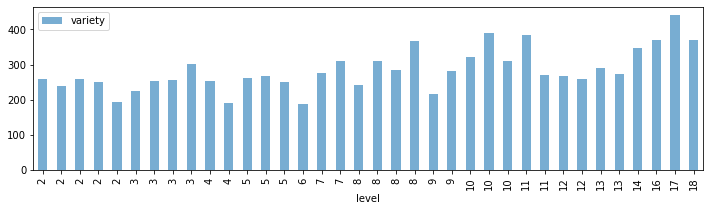

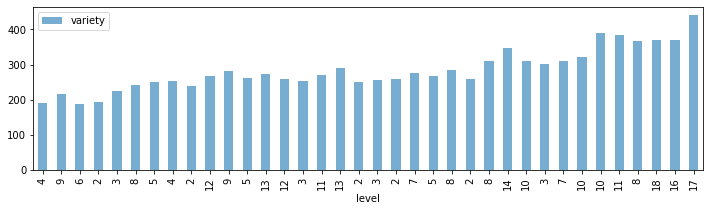

In [8]:
count_df_num = df_num

variety = []
for index, row in count_df_num.iterrows():
    #行ごとに要素が1以上の列の個数をカウント
    variety.append(len(row[row >= 1]))
    
#種類の個数を持った新たなデータフレームを作成
variety_num = pd.DataFrame(variety, columns=['variety'], dtype='int')
variety_num['level'] = df["level"].values.tolist()
variety_num['word_count'] = df["word_count"].values.tolist()


#レベル列をintに変換
variety_num['level'] = variety_num['level'].astype('int')

#レベル順でソート
sorted_variety = variety_num.sort_values(by="level", ascending=True)

display(sorted_variety)

#プロット
sorted_variety.plot(kind='bar', x='level', y='variety', alpha=0.6, figsize=(12,3))



#ワード数でソート
sorted_word_variety = variety_num.sort_values(by="word_count", ascending=True)

display(sorted_word_variety)

#プロット
sorted_word_variety.plot(kind='bar', x='level', y='variety', alpha=0.6, figsize=(12,3))

## カウントを比率に正規化

In [9]:
def toRatio(num, word_count):
    ratio = num / (int(word_count)-2)
    return ratio
    
for index, row in df.iterrows():
    df_num[index : index + 1] = df_num[index : index + 1].apply(toRatio, axis=1, word_count=df.at[index, 'length maText'])

In [10]:
#百分率表示へ
df_num = df_num * 100

# display(df_num)

# df_num.sum(axis=1)

## 影響の少ない列を削除（次元削減）

```df_Num```は次元削減後のデータ

In [11]:
#抽出する標準偏差の値
#stDv以上の標準偏差列を抽出する
stDv = 0.2


df_Num = df_num.loc[:, df_num.std() > stDv]

display(df_Num)

print(f'次元削減後 : {df_Num.shape[0]} rows ×　{df_Num.shape[1]} columns')

,[5 7 4],[ 7 4 10],[ 4 10 7],[10 7 14],[ 7 14 11],[ 4 10 14],[10 14 1],[14 1 10],[ 2 14 10],[10 4 10],[14 5 7],[5 7 5],[7 5 7],[5 7 1],[ 7 1 10],[ 1 10 7],[10 7 12],[ 7 12 11],[12 11 14],[11 14 11],[11 10 14],[10 14 10],[1 5 7],[5 7 7],[ 7 14 2],[14 2 12],[ 2 12 10],[14 11 12],[11 12 10],[12 10 3],[10 3 14],[4 5 7],[ 5 7 10],[ 7 10 14],[2 1 5],[7 1 5],[ 7 12 5],[12 5 7],[0 0 7],[0 7 4],[2 0 7],[ 0 7 12],[ 7 12 10],[12 10 14],[10 14 5],[14 5 0],[10 14 11],[10 0 7],[0 7 1],[ 7 1 11],[ 1 11 12],[10 14 2],[14 2 1],[ 1 7 12],[10 14 0],[14 0 4],[5 0 7],[ 2 10 14],[10 14 9],[14 9 14],[ 9 14 5],[13 10 14],[14 1 11],[14 1 5],[ 7 7 12],[ 7 12 2],[12 2 10],[10 14 12],[12 5 14],[ 5 7 12],[14 10 12],[ 5 7 14],[ 7 14 1],[ 3 10 14],[14 10 14],[14 12 10],[14 11 11],[11 11 12],[12 4 10],[ 3 14 2],[ 2 14 1],[ 1 11 11],[10 7 4],[12 3 10],[ 9 14 1],[ 7 4 14],[12 10 7],[14 7 1],[14 2 2],[7 4 5],[10 12 10],[ 7 14 0],[0 4 0],[1 5 0],[5 0 0],[14 0 12],[ 0 12 10],[ 4 11 14],[11 14 5],[7 4 7],[ 9 14 0],[14 0 1],[0 1 5],[ 7 12 6],[ 4 11 11],[ 0 10 14],[8 1 5],[ 1 11 1],[10 7 11],[11 12 11],[12 11 11],[11 11 14],[11 14 1],[14 2 0],[2 0 1],[ 0 7 10],[ 3 14 10],[ 7 14 10],[14 10 7],[ 1 10 12],[14 10 1],[7 1 7],[10 7 1],[11 12 5],[ 7 9 14],[ 0 7 14],[14 7 12],[14 12 11],[11 11 11],[ 0 1 10],[11 14 9],[11 14 2],[11 14 10],[8 7 7],[ 3 9 14],[10 14 7],[ 7 11 14],[11 14 12],[12 14 10],[ 3 14 1],[1 5 8],[ 2 0 12],[ 3 14 9],[ 7 3 14],[1 0 7],[ 2 14 11],[ 7 10 3],[5 8 7],[14 0 7],[11 3 14],[12 5 11],[ 3 14 5],[12 11 12],[11 12 14],[11 4 11],[14 14 11],[ 5 11 14],[12 11 4]
0,0.883392,1.060071,0.353357,0.706714,0.176678,1.236749,2.296820,0.530035,0.176678,0.176678,1.236749,0.353357,0.530035,2.296820,0.706714,1.236749,0.706714,0.176678,0.176678,0.176678,0.353357,0.883392,4.416961,0.530035,0.353357,0.353357,0.706714,0.176678,0.530035,0.530035,0.530035,0.706714,0.706714,0.883392,0.353357,1.766784,0.706714,0.706714,0.353357,0.530035,0.176678,0.353357,1.943463,2.650177,1.060071,0.883392,0.530035,0.353357,0.353357,0.353357,0.353357,0.530035,0.530035,0.353357,0.706714,0.706714,0.883392,0.706714,0.353357,0.706714,0.176678,0.353357,0.353357,1.766784,0.176678,0.353357,0.353357,1.060071,0.353357,2.120141,0.353357,1.236749,0.353357,0.530035,0.176678,0.706714,0.353357,0.353357,0.176678,0.530035,0.353357,0.353357,0.530035,0.353357,0.353357,0.176678,0.353357,0.176678,0.176678,0.176678,0.176678,0.353357,0.530035,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.347709,1.078167,1.078167,0.808625,0.000000,1.078167,1.617251,1.347709,0.000000,1.617251,1.347709,0.808625,0.808625,2.156334,2.156334,1.078167,0.269542,0.269542,0.000000,0.000000,0.000000,1.078167,3.773585,0.539084,0.000000,0.000000,0.269542,0.000000,0.539084,0.269542,0.269542,0.808625,0.269542,0.808625,0.539084,1.078167,0.269542,0.539084,0.539084,0.539084,0.269542,0.539084,1.886792,2.695418,1.078167,1.078167,0.269542,0.808625,1.886792,0.808625,0.539084,0.539084,0.269542,0.000000,0.269542,0.269542,2.156334,1.078167,0.539084,0.808625,0.269542,0.000000,0.000000,1.617251,0.269542,0.269542,0.269542,0.269542,0.000000,1.617251,0.269542,0.808625,0.539084,0.000000,0.269542,0.539084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.808625,0.000000,0.269542,0.808625,0.269542,0.000000,0.000000,1.078167,0.539084,0.000000,0.000000,0.808625,0.539084,0.000000,0.000000,0.000000,0.000000,0.269542,0.000000,0.000000,0.269542,0.000000,0.000000,0.000000,0.808625,0.808625,0.269542,0.269542,0.269542,0.269542,0.269

次元削減後 : 36 rows ×　158 columns


In [12]:
#整形後のデータ(小数点以下6桁)を書籍データと結合してshaped_dfを作成
shaped_df = pd.concat([df.loc[:, "item_id" : "level"], df_Num.round(6)], axis=1)

shaped_df

,item_id,code,name,text,word_count,length maText,publisher,level,[5 7 4],[ 7 4 10],[ 4 10 7],[10 7 14],[ 7 14 11],[ 4 10 14],[10 14 1],[14 1 10],[ 2 14 10],[10 4 10],[14 5 7],[5 7 5],[7 5 7],[5 7 1],[ 7 1 10],[ 1 10 7],[10 7 12],[ 7 12 11],[12 11 14],[11 14 11],[11 10 14],[10 14 10],[1 5 7],[5 7 7],[ 7 14 2],[14 2 12],[ 2 12 10],[14 11 12],[11 12 10],[12 10 3],[10 3 14],[4 5 7],[ 5 7 10],[ 7 10 14],[2 1 5],[7 1 5],[ 7 12 5],[12 5 7],[0 0 7],[0 7 4],[2 0 7],[ 0 7 12],[ 7 12 10],[12 10 14],[10 14 5],[14 5 0],[10 14 11],[10 0 7],[0 7 1],[ 7 1 11],[ 1 11 12],[10 14 2],[14 2 1],[ 1 7 12],[10 14 0],[14 0 4],[5 0 7],[ 2 10 14],[10 14 9],[14 9 14],[ 9 14 5],[13 10 14],[14 1 11],[14 1 5],[ 7 7 12],[ 7 12 2],[12 2 10],[10 14 12],[12 5 14],[ 5 7 12],[14 10 12],[ 5 7 14],[ 7 14 1],[ 3 10 14],[14 10 14],[14 12 10],[14 11 11],[11 11 12],[12 4 10],[ 3 14 2],[ 2 14 1],[ 1 11 11],[10 7 4],[12 3 10],[ 9 14 1],[ 7 4 14],[12 10 7],[14 7 1],[14 2 2],[7 4 5],[10 12 10],[ 7 14 0],[0 4 0],[1 5 0],[5 0 0],[14 0 12],[ 0 12 10],[ 4 11 14],[11 14 5],[7 4 7],[ 9 14 0],[14 0 1],[0 1 5],[ 7 12 6],[ 4 11 11],[ 0 10 14],[8 1 5],[ 1 11 1],[10 7 11],[11 12 11],[12 11 11],[11 11 14],[11 14 1],[14 2 0],[2 0 1],[ 0 7 10],[ 3 14 10],[ 7 14 10],[14 10 7],[ 1 10 12],[14 10 1],[7 1 7],[10 7 1],[11 12 5],[ 7 9 14],[ 0 7 14],[14 7 12],[14 12 11],[11 11 11],[ 0 1 10],[11 14 9],[11 14 2],[11 14 10],[8 7 7],[ 3 9 14],[10 14 7],[ 7 11 14],[11 14 12],[12 14 10],[ 3 14 1],[1 5 8],[ 2 0 12],[ 3 14 9],[ 7 3 14],[1 0 7],[ 2 14 11],[ 7 10 3],[5 8 7],[14 0 7],[11 3 14],[12 5 11],[ 3 14 5],[12 11 12],[11 12 14],[11 4 11],[14 14 11],[ 5 11 14],[12 11 4]
0,13,C2,Miranda,The children and their father remember Miranda...,518,568,Cambridge,5,0.883392,1.060071,0.353357,0.706714,0.176678,1.236749,2.296820,0.530035,0.176678,0.176678,1.236749,0.353357,0.530035,2.296820,0.706714,1.236749,0.706714,0.176678,0.176678,0.176678,0.353357,0.883392,4.416961,0.530035,0.353357,0.353357,0.706714,0.176678,0.530035,0.530035,0.530035,0.706714,0.706714,0.883392,0.353357,1.766784,0.706714,0.706714,0.353357,0.530035,0.176678,0.353357,1.943463,2.650177,1.060071,0.883392,0.530035,0.353357,0.353357,0.353357,0.353357,0.530035,0.530035,0.353357,0.706714,0.706714,0.883392,0.706714,0.353357,0.706714,0.176678,0.353357,0.353357,1.766784,0.176678,0.353357,0.353357,1.060071,0.353357,2.120141,0.353357,1.236749,0.353357,0.530035,0.176678,0.706714,0.353357,0.353357,0.176678,0.530035,0.353357,0.353357,0.530035,0.353357,0.353357,0.176678,0.353357,0.176678,0.176678,0.176678,0.176678,0.353357,0.530035,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,14,P1,Girl Meets Boy,My story starts in late July. It was July 21st...,348,373,Penguin,6,1.347709,1.078167,1.078167,0.808625,0.000000,1.078167,1.617251,1.347709,0.000000,1.617251,1.347709,0.808625,0.808625,2.156334,2.156334,1.078167,0.269542,0.269542,0.000000,0.000000,0.000000,1.078167,3.773585,0.539084,0.000000,0.000000,0.269542,0.000000,0.539084,0.269542,0.269542,0.808625,0.269542,0.808625,0.539084,1.078167,0.269542,0.539084,0.539084,0.539084,0.269542,0.539084,1.886792,2.695418,1.078167,1.078167,0.269542,0.808625,1.886792,0.808625,0.539084,0.539084,0.269542,0.000000,0.269542,0.269542,2.156334,1.078167,0.539084,0.808625,0.269542,0.000000,0.000000,1.617251,0.269542,0.269542,0.269542,0.269542,0.000000,1.617251,0.269542,0.808625,0.539084,0.000000,0.269542,0.539084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.808625,0.000000,0.269542,0.808625,0.

In [13]:
#データ保存

file_name = 'dataframe'
shaped_df.to_csv('./ER-numData/' + file_name + '.csv')

---

# ○機械学習

## 手法に正当性があるか確認するため可視化

df : もとのデータフレーム
df_num : 数値データを抽出したデータ

df_sorted　: レベル順でソートされたデータ
df_sorted_num : ソートされた数値データ

In [14]:
# 数値データの開始点
sn = 8

# ※objectで読み込むと型が自動で判別される(数値がstrになっている)

df = pd.read_csv("./ER-numData/dataframe.csv",  index_col=0)

display(df)
print(f'サイズ : {df.shape[0]} rows ×　{df.shape[1]} columns')

# ML_df = pd.concat([df['level'], df.iloc[:, 10:]], axis=1)


#数値データを抽出
df_num = df.iloc[:, sn:]

,item_id,code,name,text,word_count,length maText,publisher,level,[5 7 4],[ 7 4 10],[ 4 10 7],[10 7 14],[ 7 14 11],[ 4 10 14],[10 14 1],[14 1 10],[ 2 14 10],[10 4 10],[14 5 7],[5 7 5],[7 5 7],[5 7 1],[ 7 1 10],[ 1 10 7],[10 7 12],[ 7 12 11],[12 11 14],[11 14 11],[11 10 14],[10 14 10],[1 5 7],[5 7 7],[ 7 14 2],[14 2 12],[ 2 12 10],[14 11 12],[11 12 10],[12 10 3],[10 3 14],[4 5 7],[ 5 7 10],[ 7 10 14],[2 1 5],[7 1 5],[ 7 12 5],[12 5 7],[0 0 7],[0 7 4],[2 0 7],[ 0 7 12],[ 7 12 10],[12 10 14],[10 14 5],[14 5 0],[10 14 11],[10 0 7],[0 7 1],[ 7 1 11],[ 1 11 12],[10 14 2],[14 2 1],[ 1 7 12],[10 14 0],[14 0 4],[5 0 7],[ 2 10 14],[10 14 9],[14 9 14],[ 9 14 5],[13 10 14],[14 1 11],[14 1 5],[ 7 7 12],[ 7 12 2],[12 2 10],[10 14 12],[12 5 14],[ 5 7 12],[14 10 12],[ 5 7 14],[ 7 14 1],[ 3 10 14],[14 10 14],[14 12 10],[14 11 11],[11 11 12],[12 4 10],[ 3 14 2],[ 2 14 1],[ 1 11 11],[10 7 4],[12 3 10],[ 9 14 1],[ 7 4 14],[12 10 7],[14 7 1],[14 2 2],[7 4 5],[10 12 10],[ 7 14 0],[0 4 0],[1 5 0],[5 0 0],[14 0 12],[ 0 12 10],[ 4 11 14],[11 14 5],[7 4 7],[ 9 14 0],[14 0 1],[0 1 5],[ 7 12 6],[ 4 11 11],[ 0 10 14],[8 1 5],[ 1 11 1],[10 7 11],[11 12 11],[12 11 11],[11 11 14],[11 14 1],[14 2 0],[2 0 1],[ 0 7 10],[ 3 14 10],[ 7 14 10],[14 10 7],[ 1 10 12],[14 10 1],[7 1 7],[10 7 1],[11 12 5],[ 7 9 14],[ 0 7 14],[14 7 12],[14 12 11],[11 11 11],[ 0 1 10],[11 14 9],[11 14 2],[11 14 10],[8 7 7],[ 3 9 14],[10 14 7],[ 7 11 14],[11 14 12],[12 14 10],[ 3 14 1],[1 5 8],[ 2 0 12],[ 3 14 9],[ 7 3 14],[1 0 7],[ 2 14 11],[ 7 10 3],[5 8 7],[14 0 7],[11 3 14],[12 5 11],[ 3 14 5],[12 11 12],[11 12 14],[11 4 11],[14 14 11],[ 5 11 14],[12 11 4]
0,13,C2,Miranda,The children and their father remember Miranda...,518,568,Cambridge,5,0.883392,1.060071,0.353357,0.706714,0.176678,1.236749,2.296820,0.530035,0.176678,0.176678,1.236749,0.353357,0.530035,2.296820,0.706714,1.236749,0.706714,0.176678,0.176678,0.176678,0.353357,0.883392,4.416961,0.530035,0.353357,0.353357,0.706714,0.176678,0.530035,0.530035,0.530035,0.706714,0.706714,0.883392,0.353357,1.766784,0.706714,0.706714,0.353357,0.530035,0.176678,0.353357,1.943463,2.650177,1.060071,0.883392,0.530035,0.353357,0.353357,0.353357,0.353357,0.530035,0.530035,0.353357,0.706714,0.706714,0.883392,0.706714,0.353357,0.706714,0.176678,0.353357,0.353357,1.766784,0.176678,0.353357,0.353357,1.060071,0.353357,2.120141,0.353357,1.236749,0.353357,0.530035,0.176678,0.706714,0.353357,0.353357,0.176678,0.530035,0.353357,0.353357,0.530035,0.353357,0.353357,0.176678,0.353357,0.176678,0.176678,0.176678,0.176678,0.353357,0.530035,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.176678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,14,P1,Girl Meets Boy,My story starts in late July. It was July 21st...,348,373,Penguin,6,1.347709,1.078167,1.078167,0.808625,0.000000,1.078167,1.617251,1.347709,0.000000,1.617251,1.347709,0.808625,0.808625,2.156334,2.156334,1.078167,0.269542,0.269542,0.000000,0.000000,0.000000,1.078167,3.773585,0.539084,0.000000,0.000000,0.269542,0.000000,0.539084,0.269542,0.269542,0.808625,0.269542,0.808625,0.539084,1.078167,0.269542,0.539084,0.539084,0.539084,0.269542,0.539084,1.886792,2.695418,1.078167,1.078167,0.269542,0.808625,1.886792,0.808625,0.539084,0.539084,0.269542,0.000000,0.269542,0.269542,2.156334,1.078167,0.539084,0.808625,0.269542,0.000000,0.000000,1.617251,0.269542,0.269542,0.269542,0.269542,0.000000,1.617251,0.269542,0.808625,0.539084,0.000000,0.269542,0.539084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.808625,0.000000,0.269542,0.808625,0.

サイズ : 36 rows ×　166 columns


### 出現数をプロット

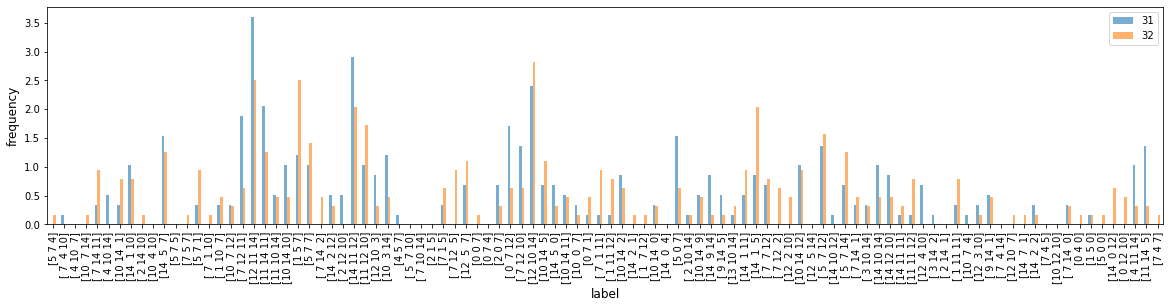

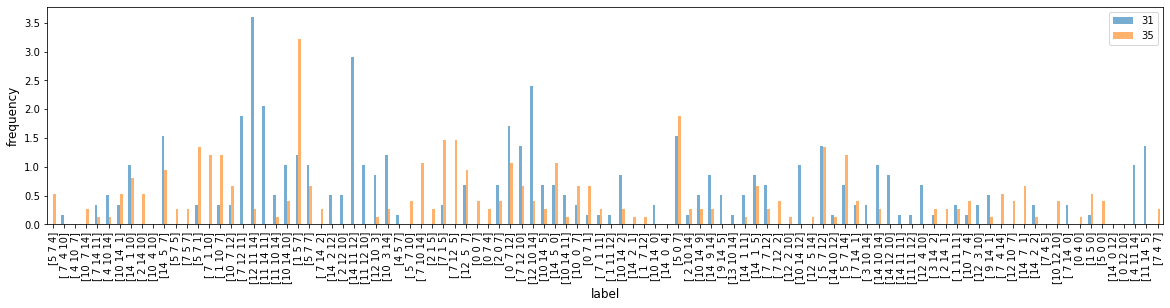

In [15]:
# .T　 dataframeの転置
# [:100]　　最初の100行 

# 何行まで表示するか
max_dis = 100


# 転置して列を抽出
T_df_num = df_num.T.iloc[:, [31, 32]]


T_df_num.iloc[:max_dis].plot(kind = 'bar', alpha=0.6, figsize=(20,4))

plt.xlabel("label",size=12)#x軸指定
plt.ylabel("frequency",size=12)#Y軸指定

plt.show()



# 転置して列を抽出
T_df_num = df_num.T.iloc[:, [31, 35]]


T_df_num.iloc[:max_dis].plot(kind = 'bar', alpha=0.6, figsize=(20,4))

plt.xlabel("label",size=12)#x軸指定
plt.ylabel("frequency",size=12)#Y軸指定

plt.show()

In [16]:
# ユークリッド距離

def euclidean_distance(x, y): 
    return np.sqrt(np.sum((x - y) ** 2))

euclidean_distance(df_num.iloc[4], df_num.iloc[6])

3.5682650813274788

In [17]:
# レベル順でソート
df_sorted = df.sort_values(by="level", ascending=True)
display(df_sorted)
df_sorted_num = df_sorted.iloc[:, sn:]

,item_id,code,name,text,word_count,length maText,publisher,level,[5 7 4],[ 7 4 10],[ 4 10 7],[10 7 14],[ 7 14 11],[ 4 10 14],[10 14 1],[14 1 10],[ 2 14 10],[10 4 10],[14 5 7],[5 7 5],[7 5 7],[5 7 1],[ 7 1 10],[ 1 10 7],[10 7 12],[ 7 12 11],[12 11 14],[11 14 11],[11 10 14],[10 14 10],[1 5 7],[5 7 7],[ 7 14 2],[14 2 12],[ 2 12 10],[14 11 12],[11 12 10],[12 10 3],[10 3 14],[4 5 7],[ 5 7 10],[ 7 10 14],[2 1 5],[7 1 5],[ 7 12 5],[12 5 7],[0 0 7],[0 7 4],[2 0 7],[ 0 7 12],[ 7 12 10],[12 10 14],[10 14 5],[14 5 0],[10 14 11],[10 0 7],[0 7 1],[ 7 1 11],[ 1 11 12],[10 14 2],[14 2 1],[ 1 7 12],[10 14 0],[14 0 4],[5 0 7],[ 2 10 14],[10 14 9],[14 9 14],[ 9 14 5],[13 10 14],[14 1 11],[14 1 5],[ 7 7 12],[ 7 12 2],[12 2 10],[10 14 12],[12 5 14],[ 5 7 12],[14 10 12],[ 5 7 14],[ 7 14 1],[ 3 10 14],[14 10 14],[14 12 10],[14 11 11],[11 11 12],[12 4 10],[ 3 14 2],[ 2 14 1],[ 1 11 11],[10 7 4],[12 3 10],[ 9 14 1],[ 7 4 14],[12 10 7],[14 7 1],[14 2 2],[7 4 5],[10 12 10],[ 7 14 0],[0 4 0],[1 5 0],[5 0 0],[14 0 12],[ 0 12 10],[ 4 11 14],[11 14 5],[7 4 7],[ 9 14 0],[14 0 1],[0 1 5],[ 7 12 6],[ 4 11 11],[ 0 10 14],[8 1 5],[ 1 11 1],[10 7 11],[11 12 11],[12 11 11],[11 11 14],[11 14 1],[14 2 0],[2 0 1],[ 0 7 10],[ 3 14 10],[ 7 14 10],[14 10 7],[ 1 10 12],[14 10 1],[7 1 7],[10 7 1],[11 12 5],[ 7 9 14],[ 0 7 14],[14 7 12],[14 12 11],[11 11 11],[ 0 1 10],[11 14 9],[11 14 2],[11 14 10],[8 7 7],[ 3 9 14],[10 14 7],[ 7 11 14],[11 14 12],[12 14 10],[ 3 14 1],[1 5 8],[ 2 0 12],[ 3 14 9],[ 7 3 14],[1 0 7],[ 2 14 11],[ 7 10 3],[5 8 7],[14 0 7],[11 3 14],[12 5 11],[ 3 14 5],[12 11 12],[11 12 14],[11 4 11],[14 14 11],[ 5 11 14],[12 11 4]
22,43,E6,Rain,Rain Rain Rain\nOh no Its Monday today. And I ...,508,593,Cengage,2,0.169205,0.000000,0.169205,0.169205,0.338409,0.338409,1.692047,1.015228,0.169205,0.000000,2.199662,0.169205,0.338409,0.338409,0.169205,1.015228,1.522843,1.015228,2.030457,0.169205,0.338409,0.338409,2.538071,1.861252,0.169205,0.338409,0.169205,1.184433,0.169205,0.507614,0.676819,0.507614,0.676819,0.846024,0.000000,0.676819,0.507614,1.015228,0.000000,0.000000,0.000000,0.169205,3.384095,2.876481,0.676819,0.000000,0.169205,0.169205,0.000000,0.000000,0.169205,0.676819,0.000000,0.676819,0.338409,0.169205,0.169205,0.338409,0.000000,0.169205,0.338409,0.000000,0.169205,1.861252,1.692047,0.169205,0.338409,2.538071,0.169205,2.876481,0.000000,0.846024,0.338409,0.507614,0.338409,0.338409,0.000000,0.000000,0.676819,0.169205,0.000000,0.000000,0.000000,0.000000,0.169205,0.000000,0.169205,0.169205,0.338409,0.338409,0.000000,0.000000,0.000000,0.169205,0.000000,0.169205,0.169205,0.000000,0.169205,0.169205,0.000000,0.000000,0.000000,1.015228,0.000000,0.507614,0.000000,0.000000,0.000000,0.338409,0.000000,0.000000,1.353638,0.000000,0.000000,0.169205,0.000000,0.000000,0.846024,0.000000,0.000000,0.338409,0.338409,0.000000,0.000000,0.000000,0.000000,1.184433,0.169205,0.000000,0.000000,0.169205,0.507614,0.169205,0.507614,0.338409,0.507614,0.169205,0.169205,0.338409,0.000000,0.507614,0.169205,0.507614,0.000000,0.169205,0.169205,0.000000,0.000000,0.000000,0.000000,0.338409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,44,E7,Old Boat,Lets put it here Mr. Walsh says to his son Rya...,437,505,Cengage,2,0.000000,0.000000,0.000000,0.596421,0.795229,0.000000,0.198807,0.397614,0.000000,0.000000,2.982107,0.000000,0.198807,0.596421,0.000000,0.198807,0.397614,2.186879,2.783300,0.596421,0.397614,0.994036,2.584493,0.000000,0.000000,0.000000,0.198807,1.789264,0.397614,1.789264,3.180915,0.198807,0.198807,0.596421,0.000000,1.590457,0.198807,0.198807,0.000000,0.198807,0.000000,0.397614,2.186879,1.192843,0.596421,1.391650,0.397614,0.198807,0.795229,0.198807,0.198807,0.000000,0.000000,0.198807,0.000000,0.000000,1.988072,0.000000,0.198807,0.198807,0.198807,0.000000,0.198807,0.994036,0.000000,0.198807,0.198807,0.596421,0.000000,3.976143,1.192843,1.192843,0.397614,0.596421,0.198807,0.397614,0.000000,0.000000,0.397614,0.000000,0.000000,0.000000,0.000000,0.198807,0.000000,0.000000,0.397614,0.

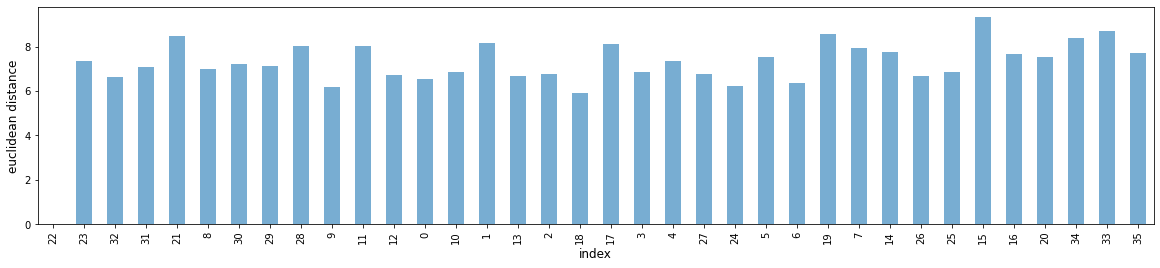

In [18]:
#レベルごとの類似度をユークリッド距離から計算

#比較対象の本
target_index = 22
target_row = df_sorted_num.loc[target_index]


for index, row in df_sorted_num.iterrows():
    df_sorted_num.at[index, 'euc_dis'] =  euclidean_distance(target_row, row)
    
#プロット
df_sorted_num['euc_dis'].plot(kind = 'bar', alpha=0.6, figsize=(20,4))

plt.xlabel("index",size=12)#x軸指定
plt.ylabel("euclidean distance",size=12)#Y軸指定

plt.show()

## クラスタリング

データがレベルと相関があるのか確かめるためにクラスタリング

In [19]:
#モジュール
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [20]:
#レベル列をリストに変換
df["new_index"] = df.index.astype(str) + '(' + df['level'].astype(str) + ')'
level = df["new_index"].values.tolist()

# 作成したnew_index列を削除
df = df.drop(columns='new_index')

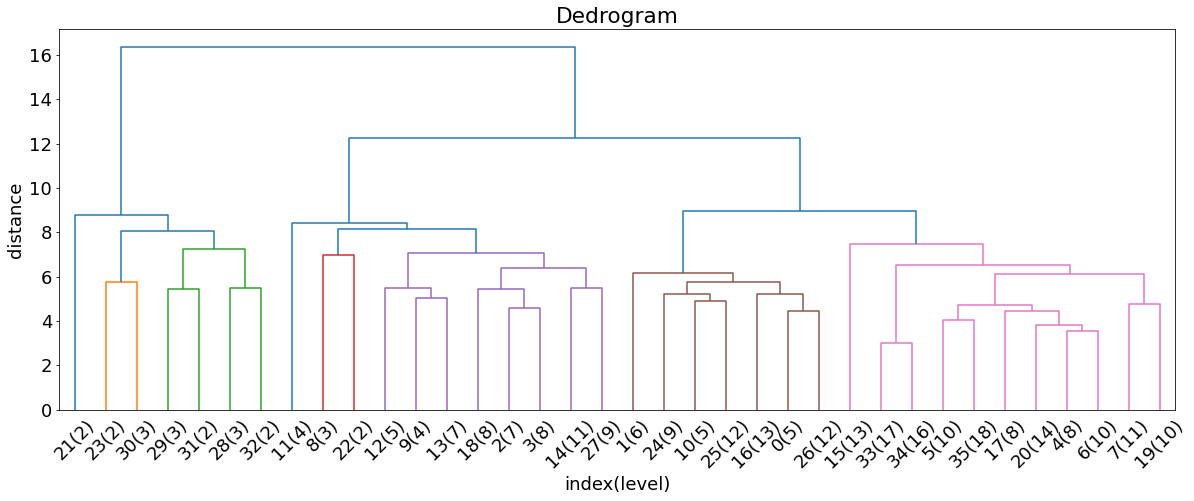

In [21]:
# ユークリッド距離とウォード法を使用してクラスタリング
result = linkage(df_num, 
                  metric = 'euclidean', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'braycurtis', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'ward')
                  #method = 'average')
                  #method= 'complete')
                  #method='weighted')
        
fig = plt.figure(figsize=(20, 7))

#フォントサイズを調整
plt.rcParams["font.size"] = 18

dendrogram(result, color_threshold = 8, labels=level, leaf_font_size=18)

plt.title("Dedrogram")
plt.xlabel("index(level)")
plt.ylabel("distance")

plt.show()

In [22]:
# クラスターの分割数
num_clu = 4

# t(クラスタの数)を指定してグルーピング
clusters = fcluster(result, t=num_clu, criterion='maxclust')
#クラスターに分類
groups = pd.Series (data=clusters, index=df['level'])

#レベルインデックスを列に追加
df_groups = groups.rename_axis('level').reset_index()

#レベルでソート
# print(groups.sort_values())



# 1~num_cluのリストを生成
index_clu = list(range(1, num_clu+1, 1))

temp_list = []
for i in index_clu:
    temp_list.append(df_groups[df_groups[0] == i])
    

cluster1 = temp_list[0]['level']
cluster2 = temp_list[1]['level']
cluster3 =temp_list[2]['level']
cluster4 = temp_list[3]['level']

#各クラスタでのレベルの平均値を出力
print("クラスターごとの平均値")
print( '1 : {:.3f} 2 : {:.3f} 3 : {:.3f} 4 : {:.3f}'.format(cluster1.mean(),  cluster2.mean(), cluster3.mean(), cluster4.mean()) )

# 分類されたクラスタ内の要素数をカウント
vc = groups.value_counts()

print("要素数")
print(vc)

クラスターごとの平均値
1 : 2.429 2 : 6.182 3 : 8.857 4 : 12.273
要素数
4    11
2    11
3     7
1     7
dtype: int64


In [23]:
#ランダムでのクラスタリング

import random


# レベルをランダムにソート
random_level = df['level'].sample(frac=1)

print(random_level)

ran_cluster1 = random_level[0 : vc[1]]
ran_cluster2 = random_level[vc[1] : vc[1]+vc[2]]
ran_cluster3 = random_level[vc[1]+vc[2] : vc[1]+vc[2]+vc[3]]
ran_cluster4 = random_level[vc[1]+vc[2]+vc[3] : vc[1]+vc[2]+vc[3]+vc[4]]

print("クラスターごとの平均値")
print( '1 : {:.3f} 2 : {:.3f} 3 : {:.3f} 4 : {:.3f}'.format(ran_cluster1.mean(),  ran_cluster2.mean(), ran_cluster3.mean(), ran_cluster4.mean()) )

5     10
30     3
14    11
6     10
28     3
22     2
10     5
2      7
4      8
16    13
27     9
1      6
24     9
3      8
0      5
11     4
17     8
31     2
19    10
20    14
13     7
15    13
32     2
26    12
35    18
33    17
21     2
12     5
8      3
25    12
7     11
29     3
23     2
18     8
9      4
34    16
Name: level, dtype: int64
クラスターごとの平均値
1 : 6.286 2 : 7.182 3 : 10.857 4 : 7.545


In [24]:
# 分散

print('提案手法によるクラスタリング : {:.3f}'.format(np.var([cluster1.mean(),  cluster2.mean(), cluster3.mean(), cluster4.mean()])))

print('ランダムな並びのクラスタリング : {:.3f}'.format(np.var([ran_cluster1.mean(),  ran_cluster2.mean(), ran_cluster3.mean(), ran_cluster4.mean()])))

提案手法によるクラスタリング : 13.015
ランダムな並びのクラスタリング : 2.993


In [25]:
from scipy import stats
A = np.array([2,2,3,3,2,3,2])
B = np.array([12,13,17,16,10,18,8])

stats.ttest_rel(A, B)

Ttest_relResult(statistic=-8.911018460310808, pvalue=0.0001113324738695241)